In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ast
from scipy.stats import ttest_rel
import math
import seaborn as sns

ACTIVE_SHAM = 'Active'
GROUP1 = 'PRE'
GROUP2 = 'POST'
N = 32
mapping = {0: 'theta', 1: 'alpha', 2: 'beta'}

DF                        index       swn                                \
                       index  theta-g1  theta-g2  alpha-g1  alpha-g2   
25  Active-Hemlata-PrevsPost  0.363110  0.336956  0.247301  0.186661   
26    Active-Malti-PrevsPost  0.371947  0.330022  0.328661  0.293298   
27   Active-Preeti-PrevsPost  0.322992  0.400658  0.269989  0.370809   
28  Active-Sharifa-PrevsPost  0.411041  0.318595  0.345908  0.243450   
29   Active-Vinita-PrevsPost  0.484185  0.362892  0.447273  0.277839   
30      Active-VKS-PrevsPost  0.341685  0.349250  0.270372  0.253615   
31     Active-Nitu-PrevsPost  0.445787  0.428367  0.199698  0.276757   
32  Active-Ranjeet-PrevsPost  0.505682  0.453196  0.435455  0.381937   
33   Active-Resham-PrevsPost  0.385706  0.356187  0.432321  0.487908   
34   Active-Rithik-PrevsPost  0.432734  0.438166  0.222955  0.322128   
35    Active-Rohan-PrevsPost  0.485667  0.496328  0.350458  0.377359   
36    Active-Suman-PrevsPost  0.390221  0.475378  0.228213  0

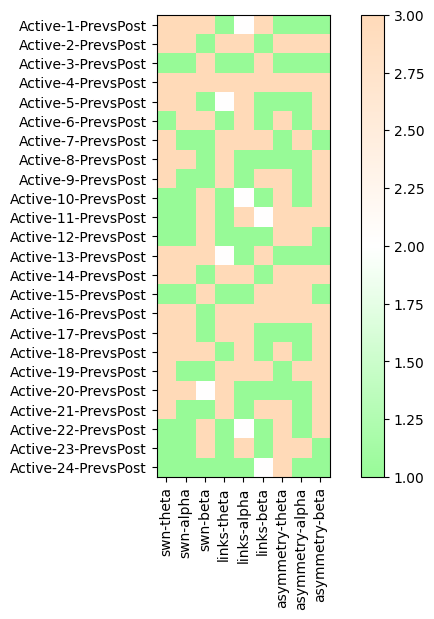

In [4]:
existing_file = f"comparison-results/result-2-{ACTIVE_SHAM}.xlsx"
df = pd.read_excel(existing_file, header=[0,1])

df_without_rows = df.drop(df.index[0:len(df)//2+1])
df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2], axis=1)
df = df_without_columns
print("DF", df)

colors = [(0.596, 0.984, 0.596), (1,1,1), (1.000, 0.855, 0.725)] # white, green, blue (0.725, 0.855, 1.000),, red
values = [1, 2, 3]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, N=256)

# 0 : If swi values NaN ----- white
# 1 : If post swi > pre swi, post links > pre links, post asymmetry < pre asymmetry ----- green
# 2 : If post swi == pre swi, |post links - pre links| < 3, post asymmetry == pre asymmetry ---- blue
# 3 : If post swi < pre swi, post links < pre links, post asymmetry > pre asymmetry ----- red

condition_matrix = np.zeros((len(df), (len(df.columns)-N-1) // 2))
for j in range(len(df)): # rows
    insignificant_bands  = []
    for i in range(1, len(df.columns)-N, 2): # cols  
        # SWN  
        if i in range(1,6):
            if np.isnan(df.iloc[j, i]) or np.isnan(df.iloc[j, i+1]):
                condition_matrix[j, i // 2] = 2 # white
                insignificant_bands.append(i)
            # else:
            elif df.iloc[j, i] < df.iloc[j, i + 1]: 
                condition_matrix[j, i // 2] = 1 # green
            elif np.abs(df.iloc[j, i] - df.iloc[j, i + 1]) <= 0:
                condition_matrix[j, i // 2] = 2 # white
                # insignificant_bands.append(i)
            else:
                condition_matrix[j, i // 2] = 3 # red
        # LINKS
        elif i in range(6,12):
            # if i-6 in insignificant_bands:
            #     condition_matrix[j, i // 2] = 0 # white
            if np.abs(df.iloc[j, i] - df.iloc[j, i + 1]) <= 3: # links difference <= 5
                condition_matrix[j, i // 2] = 2 # blue
            elif df.iloc[j, i] < df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 1 # green 
            else:
                condition_matrix[j, i // 2] = 3 # red
        # ASYMMETRY
        elif i in range(12,18):
            # if i-12 in insignificant_bands:
            #     condition_matrix[j, i // 2] = 0 # white
            # else:
            if np.abs(df.iloc[j, i] - 1) > np.abs(df.iloc[j, i+1] - 1): 
                condition_matrix[j, i//2] = 1 # green
            elif np.abs(np.abs(df.iloc[j, i] - 1) - np.abs(df.iloc[j, i+1] - 1)) <= 0: 
                condition_matrix[j, i//2] = 2 # blue
            else:
                condition_matrix[j, i//2] = 3 # red


lis = [f"{df.columns[i][0]}-{df.columns[i][1].split('-')[0]}" for i in range(1, len(df.columns)-N-1, 2)]
y_list = [f"{elem.split('-')[0]}-{i+1}-{elem.split('-')[-1]}" for i, elem in enumerate(list(df.iloc[:, 0]))]

plt.figure(figsize=(8, 6))
plt.imshow(condition_matrix, cmap=cmap)
plt.xticks(range(((len(df.columns)-N-1)// 2)), lis, rotation='vertical')
plt.yticks(range(len(df)), y_list)
plt.colorbar()
plt.show()

In [112]:
# existing_file = f"comparison-results/result-Active.xlsx"
# df = pd.read_excel(existing_file, header=[0,1])
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# active_data = df_without_columns
# existing_file = f"comparison-results/result-Sham.xlsx"
# df = pd.read_excel(existing_file)
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# sham_data = df_without_columns

# combined_data = pd.concat([active_data, sham_data], axis=0)


# # Add the new row to the DataFrame
# for index, row in active_data.iterrows():
#     # print(f"Row {index}:\n{row}\n")
#     print(len(active_data))
#     active_data.loc[len(active_data)] = row

# print(active_data)

# Assuming 'combined_data' is your DataFrame
# print(tabulate(combined_data, headers='keys', tablefmt='psql'))


# # Create a DataFrame with your data
# data = {
#     'group': ['active']*12 + ['placebo']*6,
#     'small_worldedness': [1.2, 1.3, 1.4, 1.1, 1.5, 1.6, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3],
#     'num_links': [100, 110, 95, 105, 115, 90, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110],
#     'asymmetry': [0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2],
#     'brain_region': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B']
# }
# df = pd.DataFrame(data)

# # Fit a linear regression model
# model = smf.ols(formula='small_worldedness ~ group + num_links + asymmetry + brain_region', data=df)
# results = model.fit()

# # Print the regression results
# print(results.summary())


# Assuming you have loaded the data into DataFrames active_data and sham_data

# Combine the data into a single DataFrame

# # Assume 'SWI' is the dependent variable and 'freq_band_1_g1' and 'freq_band_1_g2' are independent variables
# X = combined_data[['freq_band_1_g1', 'freq_band_1_g2']]
# X = sm.add_constant(X)  # Add a constant term to the independent variables
# y = combined_data['SWI']

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the model summary
# print(model.summary())


In [5]:
swn_values1, swn_values2 = {'theta' : [], 'alpha': [], 'beta': []} , {'theta' : [], 'alpha': [], 'beta': []}
asymmetry_values1, asymmetry_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
links_values1, links_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
hub_values1, hub_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}

master_dict = {'swn_values': [swn_values1, swn_values2], 'asymmetry_values': [asymmetry_values1, asymmetry_values2], \
               'links_values': [links_values1, links_values2], 'hub_values': [hub_values1, hub_values2]}

for j in range(len(df)): # rows
    for k in range(1, len(df.columns)-N-1, 2): # cols 
        print(k, df.iloc[j, k])
        # SWN  
        if k in range(1,6):
            para = 'swn_values'
        elif k in range(6, 12):
            para = 'links_values'
        elif k in range(12, 18):
            para = 'asymmetry_values'

        if k%6 == 1:
            master_dict[para][0]['theta'].append(df.iloc[j, k])
            master_dict[para][1]['theta'].append(df.iloc[j, k+1])
        elif k%6 == 3:
            master_dict[para][0]['alpha'].append(df.iloc[j, k])
            master_dict[para][1]['alpha'].append(df.iloc[j, k+1])
        elif k%6 == 5:
            master_dict[para][0]['beta'].append(df.iloc[j, k])
            master_dict[para][1]['beta'].append(df.iloc[j, k+1])

    
        # for k in range(len(df.columns)-6, len(df.columns)-3, 1): #cols
        #     print(k, "&&&&&&&")
        #     print(len(ast.literal_eval(df.iloc[j, k])))

1 0.363109676384656
3 0.247300804049347
5 0.0937778385163589
7 217.0
9 160.0
11 47.0
13 1.31538461538462
15 1.27956989247312
17 1.4
1 0.371946633180417
3 0.328661054069826
5 0.193075452711735
7 227.0
9 196.0
11 90.0
13 0.975
15 1.05263157894737
17 1.015625
1 0.322991523670953
3 0.269989037928121
5 0.133255161874069
7 211.0
9 172.0
11 75.0
13 0.985714285714286
15 0.981818181818182
17 1.40540540540541
1 0.411041051310697
3 0.345908064347918
5 0.175807284502937
7 230.0
9 180.0
11 68.0
13 1.06369426751592
15 1.07317073170732
17 1.06122448979592
1 0.484184985324691
3 0.447273237515511
5 0.0
7 231.0
9 194.0
11 0.0
13 1.23943661971831
15 1.27350427350427
17 1.0
1 0.341685458523021
3 0.270371900649576
5 0.253190463782236
7 198.0
9 184.0
11 87.0
13 1.02272727272727
15 1.21238938053097
17 0.761904761904762
1 0.445787474138138
3 0.199698185967758
5 0.0296223782518679
7 227.0
9 219.0
11 124.0
13 0.782122905027933
15 1.07284768211921
17 0.644859813084112
1 0.505681700384479
3 0.435454868896005
5 0.

theta
theta
theta


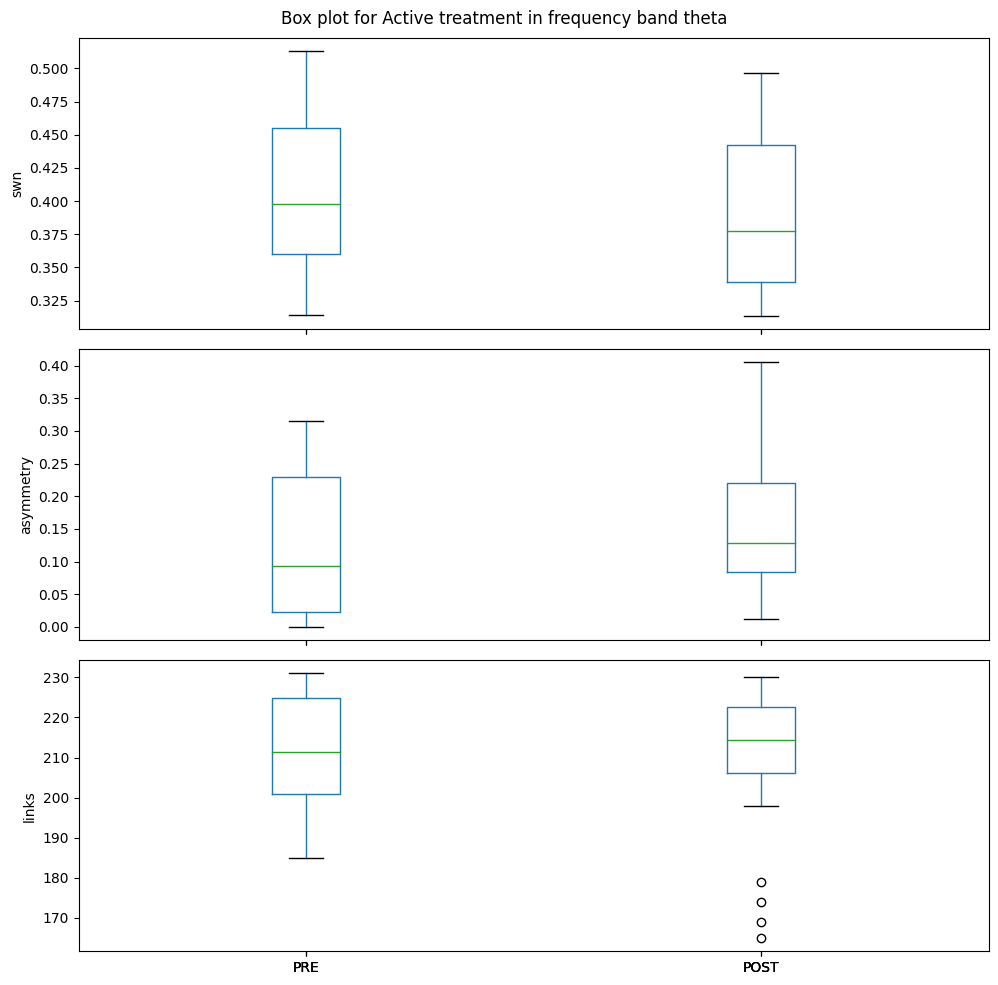

swn, p-value: 0.24329802876057477
asymmetry, p-value: 0.2755606297132821
links, p-value: 0.6739452198307888
alpha
alpha
alpha


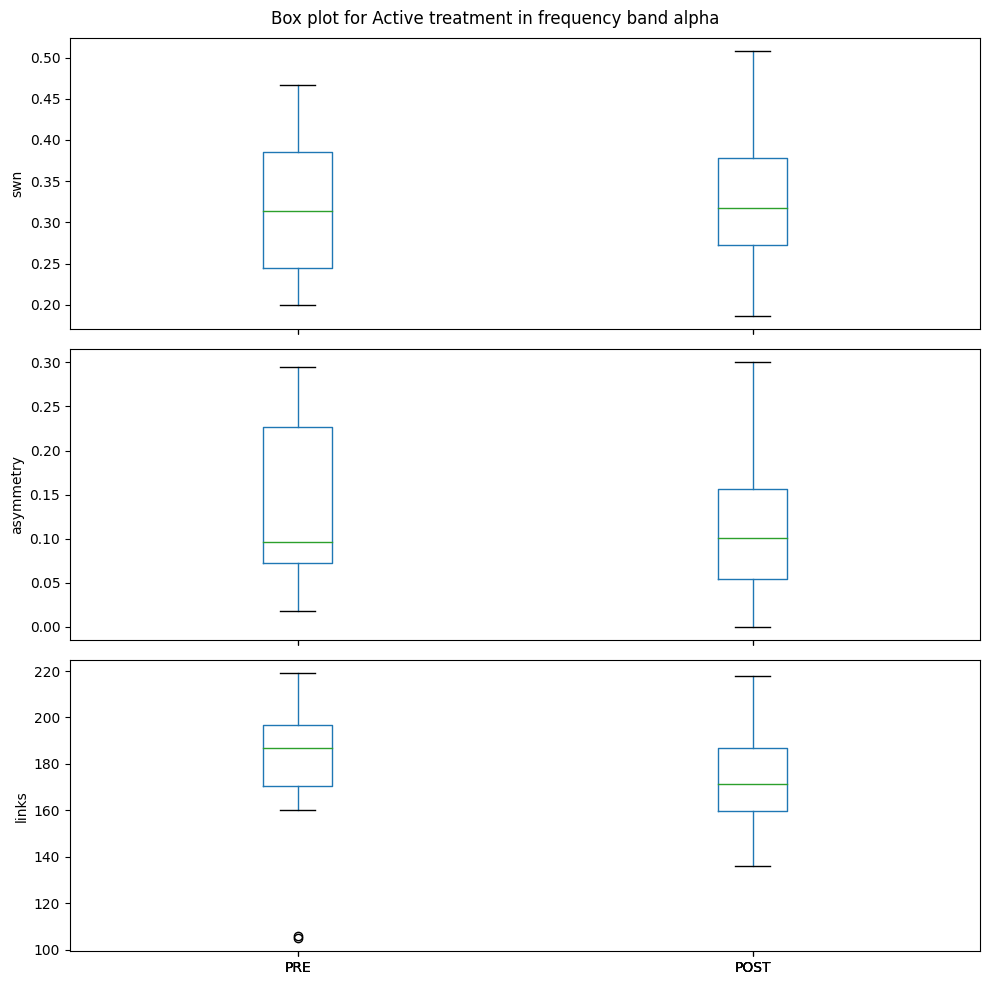

swn, p-value: 0.9375969813184739
asymmetry, p-value: 0.21601155356316368
links, p-value: 0.5329775885629089
beta
beta
beta


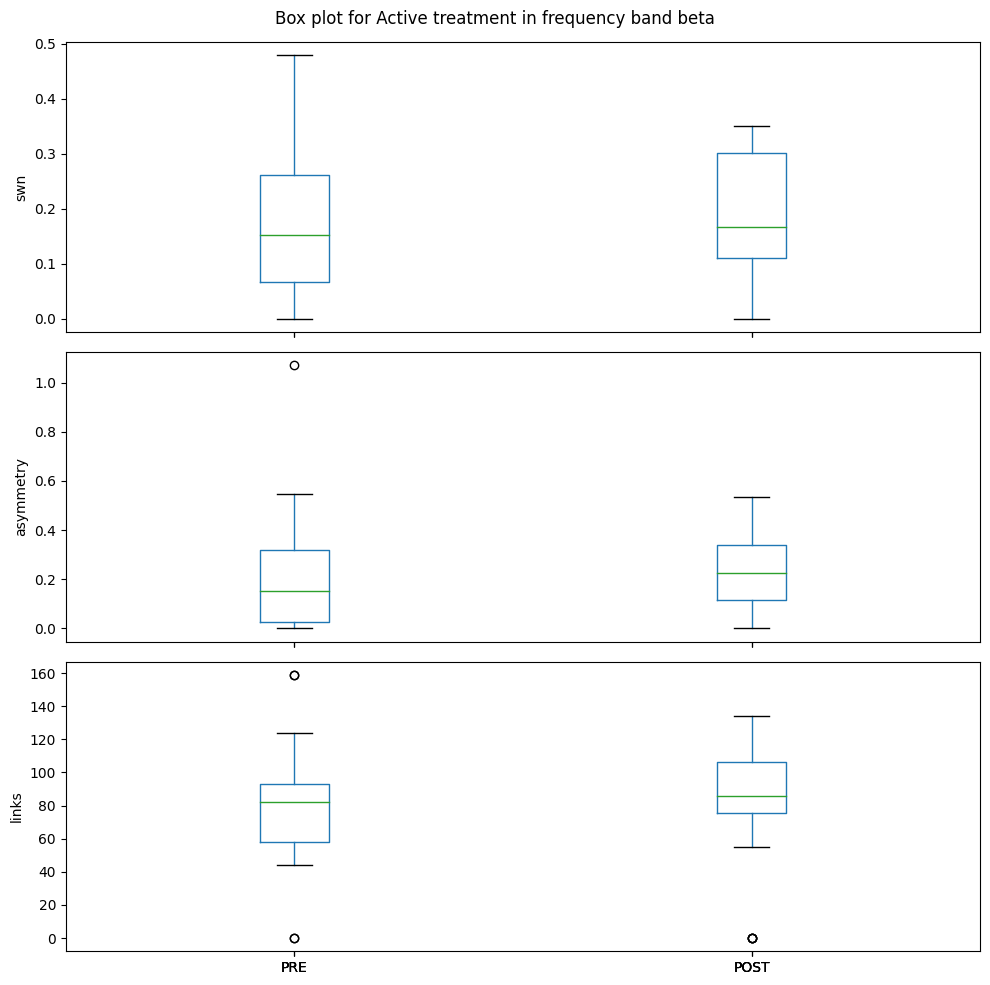

swn, p-value: 0.8376548984866354
asymmetry, p-value: 0.7100673350547815
links, p-value: 0.9461154064435179


In [7]:
for map in mapping: 
    g1_group_measures = pd.DataFrame({
        # master_dict['swn_values'][0][mapping[map]] can be replaced with swn_values1[mapping[map]]
        'swn': master_dict['swn_values'][0][mapping[map]],
        'links': master_dict['links_values'][0][mapping[map]],
        'asymmetry':  [abs(x - 1) for x in master_dict['asymmetry_values'][0][mapping[map]]]
    })


    g2_group_measures = pd.DataFrame({
        'swn': master_dict['swn_values'][1][mapping[map]],
        'links': master_dict['links_values'][1][mapping[map]],
        'asymmetry': [abs(x - 1) for x in master_dict['asymmetry_values'][1][mapping[map]]]
    })

    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    parameters = ['swn', 'asymmetry', 'links']

    for i, param in enumerate(parameters):
        print(mapping[map])
        df = pd.DataFrame({GROUP1: g1_group_measures[param], GROUP2: g2_group_measures[param]})
        df.boxplot(ax=axes[i], grid=False)
        # axes[i].boxplot([g1_group_measures[param], g2_group_measures[param]], labels=[GROUP1, GROUP2])
        axes[i].set_ylabel(param)

    fig.suptitle(f'Box plot for {ACTIVE_SHAM} treatment in frequency band {mapping[map]}')
    plt.tight_layout()
    plt.show()

    # Perform t-test for each parameter
    for param in parameters:
        # print("*********", g1_group_measures[param], g2_group_measures[param])
        t_stat, p_value = ttest_rel(g1_group_measures[param].dropna(), g2_group_measures[param].dropna())
        print(f"{param}, p-value: {p_value}")
        if p_value < 0.05:
            print(f"Significant difference for parameter: {param} for freq band: {mapping[map]}")